<a href="https://colab.research.google.com/github/Theveetha/LendingClub_EDA_CaseStudy/blob/main/LendingClub_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Lending Club EDA Case Study***
**Data:** Lending Club is a company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant's profile. This dataset gives us a details of the applicant's and their current status.

**To Analyse:** Do a general EDA on this dataset to analyse the factors which lead to the loan to be Charged Off

### **INITIAL SETUP**
**SECTION GOAL**
1. Import the required Libraries
2. Connect to the google drive to load the dataset
3. Read the csv file and create a Dataframe

##### **Import Required Libraries**

In [1091]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### **Mount Drive**

In [1092]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### **Import and Read the Dataset**

In [1093]:
file_path = '/content/drive/MyDrive/Stats&ML_Dataset/loan.csv'
data = pd.read_csv(file_path)

# To display all columns and all rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Creating a local copy
cpy_data = data
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### **FUNCTIONS**
This section consists of all the repetative functions that was created in this case study

In [1094]:
# Function to create a table with Column Name, Data Type and Sample Data for analysis
def info(data):
  data_type = pd.DataFrame(data.dtypes,columns=['Data Type'])
  data_missing = pd.DataFrame(round(data.isnull().mean()*100,2),columns=['Missing Percent'])
  sample_data = pd.DataFrame(data.head(2).T)
  data_unique = pd.DataFrame(data.apply(pd.Series.nunique, axis = 0),columns=['Unique Value Count'])
  data_concat = pd.concat([data_type,data_missing,data_unique,sample_data],axis=1)
  data_concat.reset_index(inplace=True)
  data_concat.rename(columns={0:'Sample 1',1:'Sample 2','index':'Column Name'},inplace=True)
  return data_concat

In [1095]:
# Function to remove the border in graph
def section(sec):
  sec.spines['bottom'].set_visible(True)
  sec.spines['top'].set_visible(False)
  sec.spines['left'].set_visible(False)
  sec.spines['right'].set_visible(False)
  return sec

In [1096]:
# Function to rotate xticks within subplots
def rotate_xlabels(ax,angle):
  for label in ax.get_xticklabels():
    label.set_rotation(angle)

In [1097]:
# Function to remove content for empty subplot
def empty_subplot(ax):
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)
  for position in ['left', 'right', 'top', 'bottom']:
    ax.spines[position].set_visible(False)

In [1098]:
# Function for Count plot
def countplot(axes,data,x_column,hue_labels,palette):
  sns.countplot(ax=axes, data=data, x=x_column, hue=hue_labels, palette=palette)
  for containers in axes.containers:
    axes.bar_label(containers)
    axes.set_xlabel(x_column)
    axes.set_ylabel('Count')
    axes.grid(axis='y', linestyle=':', color='black', alpha=0.3)
    section(axes)

In [1099]:
# Function for Barplot
def barplot(axes,data,x_columns,y_columns,palette,hue,orient):
  sns.barplot(ax=axes, data=data, x=x_columns, y=y_columns,palette=palette,hue=hue,orient=orient)
  axes.grid(axis='y', linestyle=':', color='black', alpha=0.3)
  section(axes)

In [1100]:
# Function for pieplot for single column
def pieplot_single(data,cols,axes,explode,colors):
  # Calculate proportions for Target
  target_counts = data.groupby(cols).size().sort_values(ascending=False)
  status_labels = target_counts.index.tolist()
  # Pieplot
  axes.pie(target_counts,labels=status_labels,autopct='%0.1f%%',colors=colors,shadow=True,counterclock=False
          ,explode=explode)

In [1101]:
# Function for pieplot for multiple column
def pieplot_multi(data,cols,axes,explode,x,colors):
  # Calculate proportions for Target
  target_counts = data.groupby(cols).size().unstack()
  target_counts = target_counts.fillna(0)
  status_labels = target_counts.index.tolist()
  # Pieplot
  axes.pie(target_counts[x],labels=status_labels,autopct='%0.1f%%',colors=colors,shadow=True,counterclock=False
          ,explode=explode)

In [1102]:
# Function for Histogram plot
def histplot(axes,data,x_columns,hue_labels,palette):
  sns.histplot(ax=axes, data=data, x=x_columns, hue=hue_labels, palette=palette)
  axes.set_xlabel(cols.upper())
  axes.set_ylabel('DENSITY')
  axes.grid(axis='y', linestyle=':', color='black', alpha=0.3)
  section(axes)

In [1103]:
# Function for Boxplot
def boxplot(axes,data,x_columns,hue_labels,palette):
  sns.boxplot(ax=axes, data=data, x=x_columns, hue=hue_labels, palette=palette)
  axes.set_xlabel(cols.upper())
  axes.set_ylabel('DENSITY')
  axes.grid(axis='y', linestyle=':', color='black', alpha=0.3)
  section(axes)

In [1104]:
# Function of Distribution plot
def distplot(x_columns,axes):
  sns.distplot(x_columns,ax=axes)
  axes.set_ylabel('DENSITY')
  axes.grid(axis='y', linestyle=':', color='black', alpha=0.3)
  section(axes)

### **UNDERSTANDING THE DATA**
**SECTION GOAL:**
1. To get a basic understanding of the dataset provided
2. Figure out the numerical and categorical features of dataset
3. Analyze each column to understand the missing values
4. Find out which all columns are having more than 30% missing values
5. Understand the statistic summary
6. Check if the dataframe has any repeated or duplicate values

##### **Dimensions**

In [1105]:
data.shape
print(f"Number of Columns : {data.shape[1]}")
print(f"Number of Rows : {data.shape[0]}")

Number of Columns : 111
Number of Rows : 39717


##### **Columns before preprocessing data**

In [1106]:
print("Features before preprocessing the data")
col = []
for cols in data.columns:
  col.append(cols)
print(col)

Features before preprocessing the data
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m'

##### **Numerical and Categorical Columns**

In [1107]:
num, obj = 0,0
for feature in data.columns:
  if data.dtypes[feature] != 'O':
    num += 1
  else:
    obj += 1
label = ['Numerical','Categorical']
count = [num,obj]
data_dict = {'Columns':label,'Count':count}
pd.DataFrame(data_dict)

,Columns,Count
0,Numerical,87
1,Categorical,24


##### **Analysis on Categorical Column**

In [1108]:
cat_cols_df = pd.DataFrame(data.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
cat_cols_df.reset_index(inplace=True)
cat_cols_df.columns = ['Column Name', 'Unique Values Count']

In [1109]:
filtered_cols = cat_cols_df[
    (cat_cols_df['Unique Values Count'] == 1) |  # Single unique value
    (cat_cols_df['Unique Values Count'] == data.shape[0])  # All unique values
]

cat_cols_remove = filtered_cols['Column Name'].tolist()
filtered_cols.sort_values('Unique Values Count',ascending=True,inplace=True)
print("Categorical Column having Single Unique Value : 3\nColumns having all the values as unique : 1")
print("******************************************")
filtered_cols

Categorical Column having Single Unique Value : 3
Columns having all the values as unique : 1
******************************************


,Column Name,Unique Values Count
10,pymnt_plan,1
19,initial_list_status,1
23,application_type,1
11,url,39717


##### **OBSERVATION - CATEGORICAL COLUMN**
The categorical columns which are having single unique value doesn't impact or aid our analysis.
1. **pymnt_plan**
2. **initial_list_status**
3. **application_type**

The categorical columns which have all the values to be unique based on the description isn't going to aid our analysis
1. **url**

***To Do:***

**Remove** the above mentioned **4 columns** from the dataframe

##### **Analysis on Numerical Column**

In [1110]:
num_cols_df = pd.DataFrame(data.select_dtypes(exclude='object').apply(pd.Series.nunique, axis = 0))
num_cols_df.reset_index(inplace=True)
num_cols_df.columns = ['Column Name', 'Unique Values Count']

In [1111]:
filtered_cols = num_cols_df[
    (num_cols_df['Unique Values Count'] == 1) | # Single unique values
    (num_cols_df['Unique Values Count'] == data.shape[0]) # All unique values
]
num_cols_remove = filtered_cols['Column Name'].tolist()
filtered_cols.sort_values('Unique Values Count',ascending=True,inplace=True)
print("Numerical Column having Single Unique Value : 5\nColumns having all the values as unique : 2")
print("******************************************")
filtered_cols

Numerical Column having Single Unique Value : 5
Columns having all the values as unique : 2
******************************************


,Column Name,Unique Values Count
26,collections_12_mths_ex_med,1
28,policy_code,1
32,acc_now_delinq,1
54,chargeoff_within_12_mths,1
55,delinq_amnt,1
82,tax_liens,1
0,id,39717
1,member_id,39717


##### **OBSERVATION - NUMERICAL COLUMN**
The numerical columns which are having single unique value doesn't impact or aid our analysis.
1. **collections_12_mths_ex_med**
2. **policy_code**
3. **acc_now_delinq**
4. **chargeoff_within_12_mths**
5. **delinq_amnt**
6. **tax_liens**

The numerical columns which have all the values to be unique based on the description isn't going to aid with our current analysis.
1. **id**
2. **member_id**

***To Do:***

**Remove** the above mentioned **6 columns** from the dataframe

##### **Missing values**

In [1112]:
mis_val = data.isnull().sum()
mis_val_percent = round(100 * data.isnull().sum()/len(data),2)
mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
mis_val_table.columns = ['Missing Values', '% of Total Values']
mis_val_table = mis_val_table.sort_values('% of Total Values',ascending=False)

Category = []

for i in range(0,len(mis_val_table)):
  if mis_val_table['% of Total Values'][i] == 0:
    Category.append('Missing % = 0')
  elif 0 < mis_val_table['% of Total Values'][i] <= 30:
    Category.append('Missing % < 30')
  else:
    Category.append('Missing % > 30')

mis_val_table['Category'] = Category
mis_val_table.reset_index(inplace=True)
mis_val_table.rename(columns={'index':'Column Name'},inplace=True)

# Add Data Types
data_types = [data[col].dtypes for col in mis_val_table['Column Name'].values]
mis_val_table['Data Type'] = data_types

mis_val_gt30 = mis_val_table[mis_val_table['Category'] == 'Missing % > 30']
mis_val_lt30 = mis_val_table[mis_val_table['Category'] == 'Missing % < 30']
mis_val_lt30

,Column Name,Missing Values,% of Total Values,Category,Data Type
58,emp_title,2459,6.19,Missing % < 30,object
59,emp_length,1075,2.71,Missing % < 30,object
60,pub_rec_bankruptcies,697,1.75,Missing % < 30,float64
61,last_pymnt_d,71,0.18,Missing % < 30,object
62,collections_12_mths_ex_med,56,0.14,Missing % < 30,float64
63,chargeoff_within_12_mths,56,0.14,Missing % < 30,float64
64,revol_util,50,0.13,Missing % < 30,object
65,tax_liens,39,0.10,Missing % < 30,float64
66,title,11,0.03,Missing % < 30,object
67,last_credit_pull_d,2,0.01,Missing % < 30,object


##### **Graphical representation**

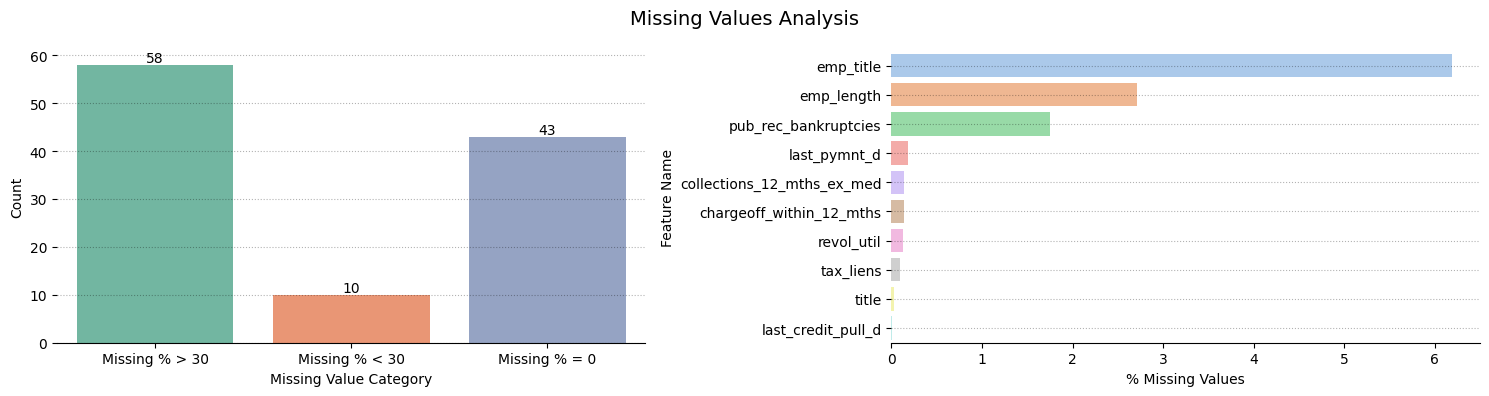

In [1113]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
axes = axes.flatten()

# Distribution of Missing Values
countplot(axes=axes[0],data=mis_val_table,x_column='Category',hue_labels='Category',palette='Set2')
axes[0].set_xlabel('Missing Value Category')

barplot_data = mis_val_table[mis_val_table['Category'] == 'Missing % < 30']
barplot_xcolumn = '% of Total Values'
barplot_ycolumn = mis_val_table[mis_val_table['Category'] == 'Missing % < 30']['Column Name']

# Columns with Missing Values < 30%
barplot(axes=axes[1],data=barplot_data,x_columns=barplot_xcolumn
        ,y_columns=barplot_ycolumn,palette='pastel',hue=None,orient=None)
axes[1].set_ylabel('Feature Name')
axes[1].set_xlabel('% Missing Values')

fig.suptitle('Missing Values Analysis', fontsize=14)
plt.tight_layout()
plt.show()

##### **Five Number Summary**

In [1114]:
data[mis_val_lt30[mis_val_lt30['Data Type'] != 'object']['Column Name'].values].describe()

,pub_rec_bankruptcies,collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens
count,39020.000000,39661.0,39661.0,39678.0
mean,0.043260,0.0,0.0,0.0
std,0.204324,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.0
50%,0.000000,0.0,0.0,0.0
75%,0.000000,0.0,0.0,0.0
max,2.000000,0.0,0.0,0.0


In [1115]:
data[mis_val_lt30[mis_val_lt30['Data Type'] == 'object']['Column Name'].values].describe()

,emp_title,emp_length,last_pymnt_d,revol_util,title,last_credit_pull_d
count,37258,38642,39646,39667,39706,39715
unique,28820,11,101,1089,19615,106
top,US Army,10+ years,May-16,0%,Debt Consolidation,May-16
freq,134,8879,1256,977,2184,10308


##### **OBSERVATION - MISSING VALUE**
Columns having **more than 30% missing value (58 columns)** will lead to biased output.

Columns having **more than 0% and less than 30% missing values (10 columns)** need to be treated for further analysis.

***To Do:***
1. **Remove** those **58 columns** from our dataframe
2. For **categorical column** replace the missing value with **mode**
3. For **numerical column** replace the missing value with **median** since the differnce between them is less than 10% of 1-SD.

##### **Find Duplicate Rows**

In [1116]:
count = data[data.duplicated()].shape
print(f"There are no duplicates in the dataset" if count[0]==0 else f"There are {count[0]} duplicates in the dataset")

There are no duplicates in the dataset


##### **OBSERVATION - DUPLICATE ROWS**
There are **no Duplicate records** in the dataset.

##### **DATA PREPROCESSING**

Based on our observations from basic understanding of the data we have to do the below mentioned data preprocessing:
1. Delete the unrequired columns
2. Handle the missing values by replacing it with either mode or median correspondingly

###### **Handle Missing Value**

In [1117]:
for col in data[mis_val_lt30['Column Name'].values]:
  if data[col].dtype == 'object':
    data[col].fillna(data[col].mode()[0], inplace=True)
  else:
    data[col].fillna(data[col].median(), inplace=True)

print(f"Count of columns having missing values : {len(data.columns[data.isnull().any()])}")

Count of columns having missing values : 58


###### **Remove Columns**

In [1118]:
from itertools import chain
remove_cols = list(chain(cat_cols_remove,num_cols_remove,mis_val_gt30['Column Name'].values))

data.drop(columns=remove_cols,inplace=True)
print(f"Post cleanup there are {data.shape[1]} columns present in our dataframe")

Post cleanup there are 41 columns present in our dataframe


### **DATA DICTIONARY**
**SECTION GOAL:**
1. Get an overall understanding of individual columns by refering Data Dictionary to know which all variables are important

##### **Data Description**

In [1119]:
data_desc = pd.read_excel('/content/drive/MyDrive/Stats&ML_Dataset/LendingClub_Description.xlsx')
data_desc[['Column Name','Description']]

,Column Name,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,funded_amnt,The total amount committed to that loan at tha...
2,funded_amnt_inv,The total amount committed by investors for th...
3,term,The number of payments on the loan. Values are...
4,int_rate,Interest Rate on the loan
5,installment,The monthly payment owed by the borrower if th...
6,grade,LC assigned loan grade
7,sub_grade,LC assigned loan subgrade
8,emp_title,The job title supplied by the Borrower when ap...
9,emp_length,Employment length in years. Possible values ar...


##### **OBSERVATION - DATA DICTIONARY**
Based on the Data Description provided for each feature we can see few columns are irrelavant to make a decision on loan approval. So we can remove such columns.
1. **emp_title**
2. **title**
3. **zip_code**
4. **addr_state**

There are few other columns which are have no contribution to our analysis, as they are derived post apporval of our loan. So we can remove those columns also
1. **delinq_2yrs**
2. **earliest_cr_line**
3. **revol_bal**
4. **out_prncp**
5. **out_prncp_inv**
6. **total_pymnt**
7. **total_rec_prncp**
8. **total_rec_int**
9. **total_rec_late_fee**
10. **recoveries**
11. **collection_recovery_fee**
12. **last_pymnt_d**
13. **last_pymnt_amnt**
14. **last_credit_pull_d**

Based on the description the below mentioned columns hold similar value to that of **loan_amnt**. So we can removethose columns
1. **funded_amnt**
2. **funded_amnt_inv**

***To Do:***

**Remove** the above mentioned **18 columns** from the dataframe for further analysis

##### **DATA PREPROCESSING**

Based on our observations from Data Dictionary we have to delete the column which aren't helpful for our analysis.

###### **Remove Columns**

In [1120]:
# In the description excel i already have added a column to Required or not. Using that Delete the columns
remove_cols = data_desc[data_desc['Required'] == 'No']['Column Name'].values

data.drop(columns=remove_cols,inplace=True)
print(f"Post cleanup there are {data.shape[1]} columns present in our dataframe")

Post cleanup there are 20 columns present in our dataframe


### **DATA TRANSFORMATION**
**SECTION GOALS:**
1. Understand the data type of each column
2. Perform Derived Metrics or Data Type Casting if required

##### **Detailed Info on all columns**

In [1121]:
data_info = info(data)
data_info

,Column Name,Data Type,Missing Percent,Unique Value Count,Sample 1,Sample 2
0,loan_amnt,int64,0.0,885,5000,2500
1,term,object,0.0,2,36 months,60 months
2,int_rate,object,0.0,371,10.65%,15.27%
3,installment,float64,0.0,15383,162.87,59.83
4,grade,object,0.0,7,B,C
5,sub_grade,object,0.0,35,B2,C4
6,emp_length,object,0.0,11,10+ years,< 1 year
7,home_ownership,object,0.0,5,RENT,RENT
8,annual_inc,float64,0.0,5318,24000.0,30000.0
9,verification_status,object,0.0,3,Verified,Source Verified


##### **OBSERVATION - DATA TRANSFORMATION**
1. Columns **int_rate** and **revol_util** should be float value but here they are **object** type which can be **converted**
2. Though **issue_d** is an object type we can convert it to datetime to **extract the year**
3. **Anomaly** is detected in the **emp_length** column. So we can extract the number of years
***To Do:***
1. Do **Type Casting** in **int_rate** and **revol_util** inorder to extract the numerical value
2. Perform **Derived Metrics** in **issue_d** to extract month and year to new columns **issue_month** and **issue_year**
3. **Delete** the column **issue_d** as it has redundant information
4. **Extract Years** from **emp_length** and update the same

##### **DATA PREPROCESSING**

Based on our observations from Data Transformation we have to do the below mentioned data preprocessing:
1. Data Type Casting
2. Derived Metrics

###### **Data Type Casting**

In [1122]:
# Function to strip value and convert to numeric datatype
def strip_value(data,cols,value,type_cast):
  data[cols] = data[cols].str.rstrip(value)
  data[cols] = type_cast(data[cols])
  return data[cols]

# Strip for int_rate
data['int_rate'] = strip_value(data,'int_rate','%',pd.to_numeric)
data['revol_util'] = strip_value(data,'revol_util','%',pd.to_numeric)

print("Data Type post casting:")
pd.DataFrame(data[['int_rate','revol_util']].dtypes)

Data Type post casting:


,0
int_rate,float64
revol_util,float64


###### **Derived Metrices**

In [1123]:
# Type Casting to Date time
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')

# Deriving new columns
data['issue_year'] = data['issue_d'].dt.year
data['issue_month'] = data['issue_d'].dt.month

print("Sample Data with derived columns:")
pd.DataFrame(data[['issue_d','issue_month','issue_year']]).head(2)

Sample Data with derived columns:


,issue_d,issue_month,issue_year
0,2011-12-01,12,2011
1,2011-12-01,12,2011


###### **Remove Column**

In [1124]:
data.drop(columns='issue_d',inplace=True)
print(f"Post cleanup there are {data.shape[1]} columns present in our dataframe")

Post cleanup there are 21 columns present in our dataframe


###### **Anomaly Detection**

In [1125]:
data['emp_length'].replace(to_replace='< 1 year', value='0', inplace=True, regex=True)
data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
data['emp_length'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7'],
      dtype=object)

###### **Columns Post Data Processing**

In [1126]:
data_info = info(data)
data_info

,Column Name,Data Type,Missing Percent,Unique Value Count,Sample 1,Sample 2
0,loan_amnt,int64,0.0,885,5000,2500
1,term,object,0.0,2,36 months,60 months
2,int_rate,float64,0.0,371,10.65,15.27
3,installment,float64,0.0,15383,162.87,59.83
4,grade,object,0.0,7,B,C
5,sub_grade,object,0.0,35,B2,C4
6,emp_length,object,0.0,11,10,0
7,home_ownership,object,0.0,5,RENT,RENT
8,annual_inc,float64,0.0,5318,24000.0,30000.0
9,verification_status,object,0.0,3,Verified,Source Verified


### **EXPLORATORY DATA ANALYSIS**
**SECTION GOAL:**
1. Perform Univariate, Bivariate and Multivariate Analysis to understand each column in the dataframe and its significance to our target variable
2. Plot various graphs to justify our understanding
3. Treat outliers for required columns

##### **Target Column Analysis**

In [1127]:
data['loan_status'].describe()

count          39717
unique             3
top       Fully Paid
freq           32950
Name: loan_status, dtype: object

In [1128]:
data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

###### **Graphical Representation**

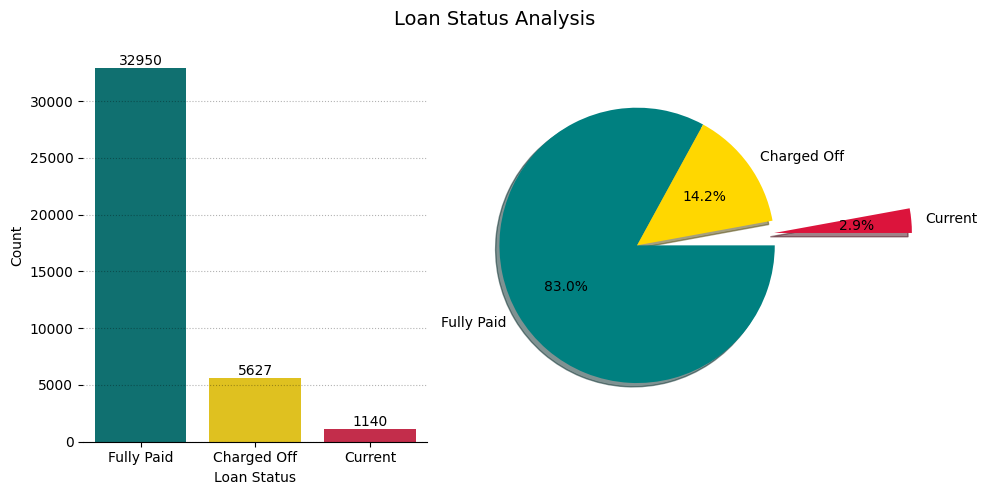

In [1129]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))

axes = axes.flatten()

colors = ['teal','gold','crimson']
# Count Plot
viz = countplot(axes=axes[0],data=data,x_column='loan_status',hue_labels='loan_status',palette=colors)
axes[0].set_xlabel('Loan Status')

cols = ['loan_status']
explode = [0,0,1]
# Pieplot
pieplot_single(data=data,cols=cols,axes=axes[1],explode=explode,colors=colors)

plt.suptitle('Loan Status Analysis', fontsize=14)
plt.tight_layout()
plt.show()

###### **OBSERVATION - Loan_Status**
1. Looking at the numbers we can conclude that the data is very much imbalanced.
2. Since our EDA is focused on whether to provide loan to the applicant, we can remove the data with Current status

###### **DATA PREPROCESSING**
Based on our observation on loan_status column, remove records with loan_status = Current

In [1130]:
data = data[data['loan_status'] != 'Current']
print(f"Post removal of Current Loans there are {data.shape[0]} records")

Post removal of Current Loans there are 38577 records


##### **Categorical Column Analysis**

In [1131]:
cat_cols = data[data_info[data_info['Data Type'] == 'object']['Column Name'].values].columns
cat_cols = [item for item in cat_cols if item != 'loan_status']
print(f"Count of Categorical Features : {len(cat_cols)}")

Count of Categorical Features : 7


###### **Graphical Representation**

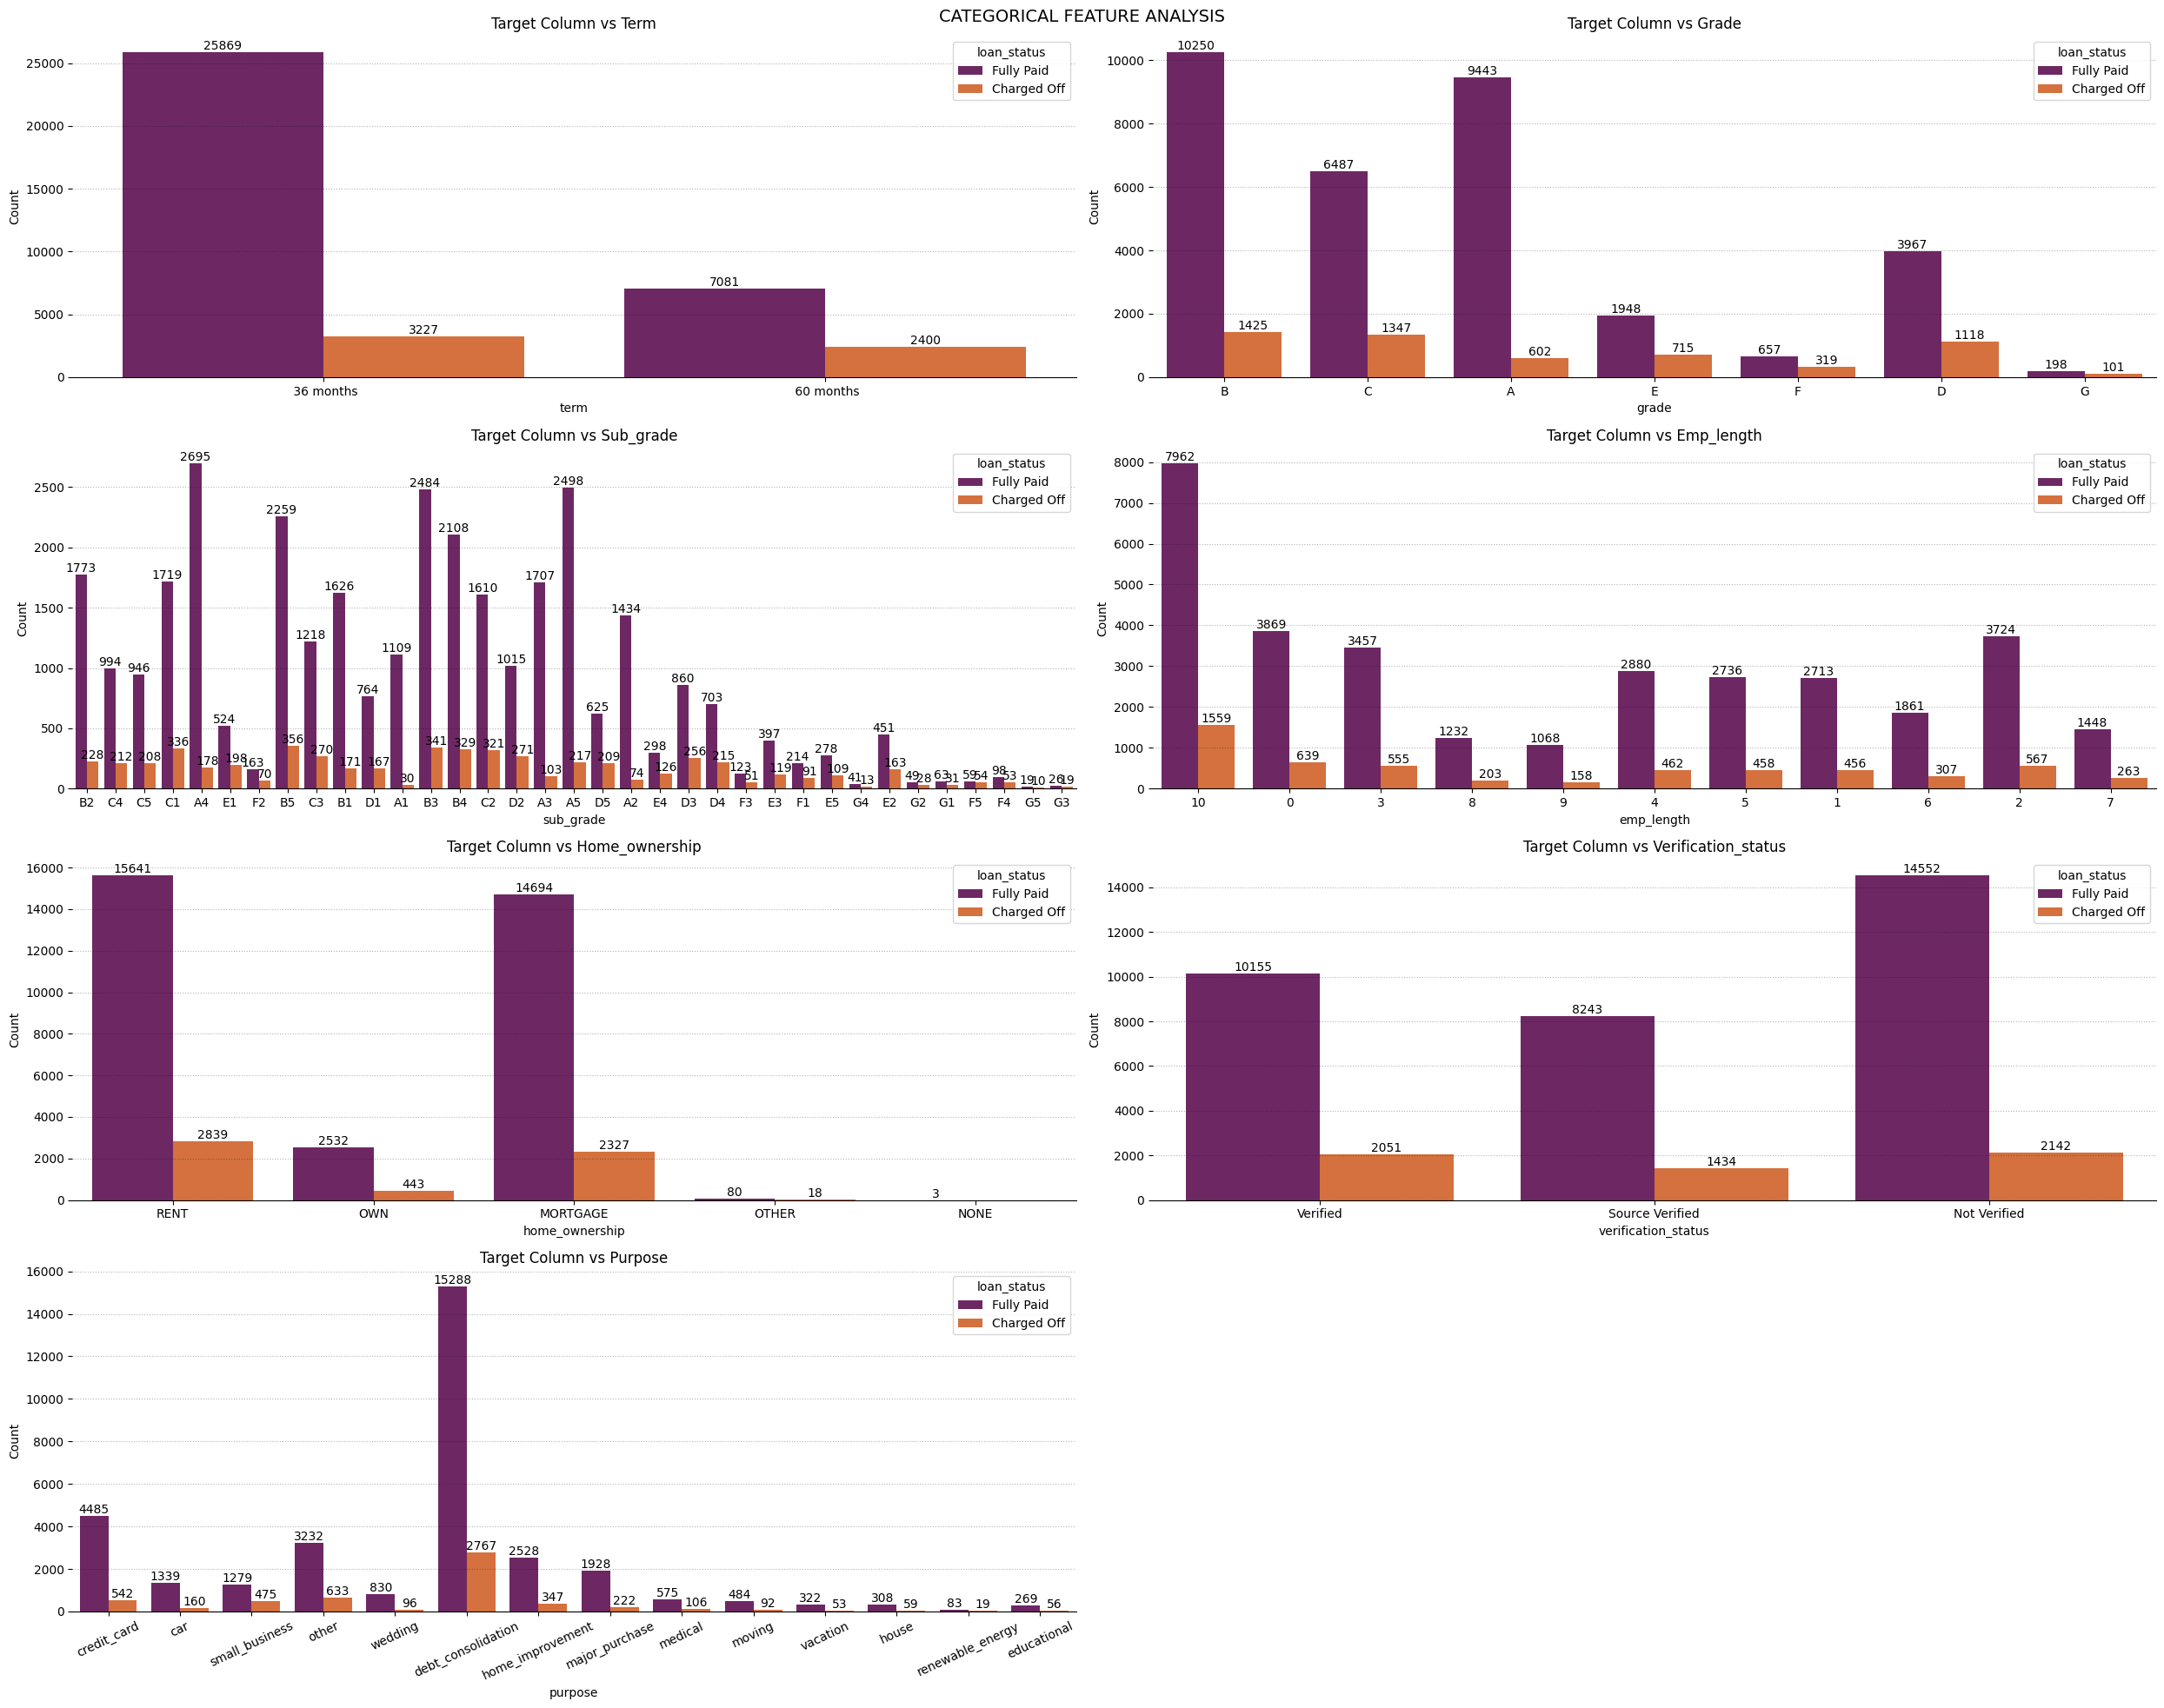

In [1132]:
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(25,20))
axes = axes.flatten()

# Graph for loan_status vs categorical columns
for i,cols in enumerate(cat_cols):
  viz = countplot(axes=axes[i],data=data,x_column=cols,hue_labels='loan_status',palette='inferno')
  axes[i].set_title(f"Target Column vs {cols.capitalize()}")

# rotate xlabel where its not fit properly
rotate_xlabels(axes[6],25)
# Remove content for empty subplot
empty_subplot(axes[7])

plt.suptitle('CATEGORICAL FEATURE ANALYSIS',fontsize=14)
plt.subplots_adjust(top=3)
plt.tight_layout()
plt.show()

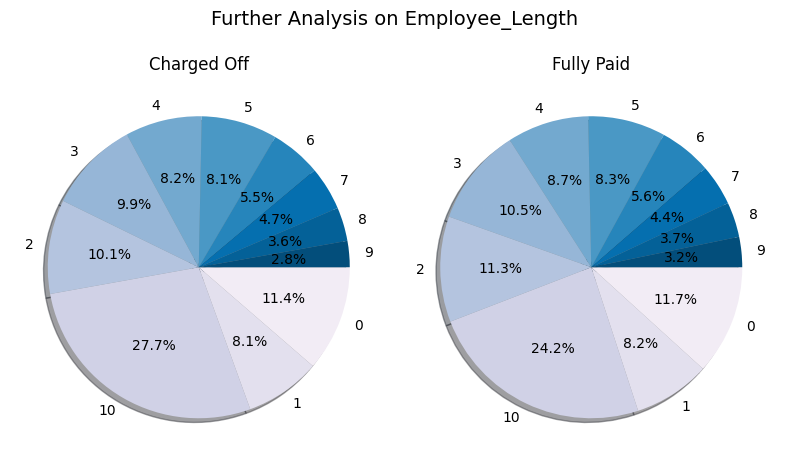

In [1133]:
# Pieplot for emp_length and home_ownership
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
axes = axes.flatten()

# emp_length
emp_cols = ['emp_length','loan_status']
emp_colors = sns.color_palette('PuBu', len(data[emp_cols[0]].unique()))
pieplot_multi(data=data,cols=emp_cols,axes=axes[0],explode=None,x='Charged Off',colors=emp_colors)
axes[0].set_title('Charged Off')
pieplot_multi(data=data,cols=emp_cols,axes=axes[1],explode=None,x='Fully Paid',colors=emp_colors)
axes[1].set_title('Fully Paid')

plt.suptitle('Further Analysis on Employee_Length', fontsize=14)
plt.tight_layout()
plt.show()

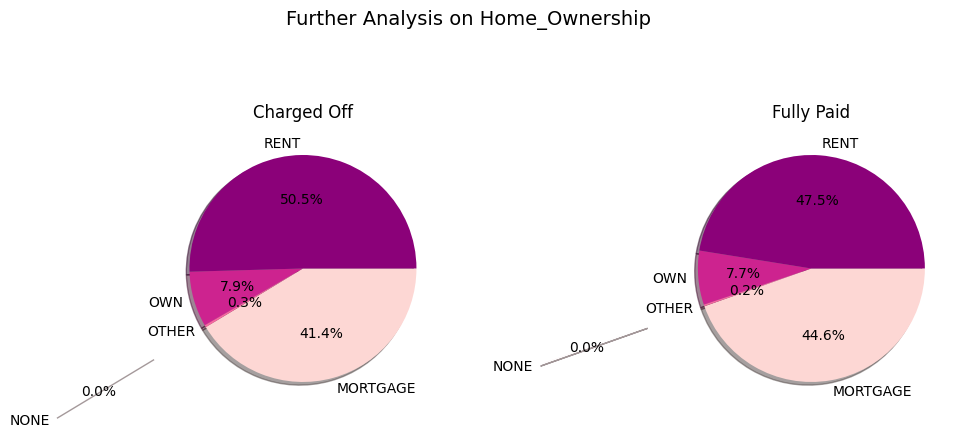

In [1134]:
# Pieplot for emp_length and home_ownership
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes = axes.flatten()

# home_ownership
home_cols = ['home_ownership','loan_status']
home_colors = sns.color_palette('RdPu', len(data[home_cols[0]].unique()))
explode = [0,1.5,0,0,0]
pieplot_multi(data=data,cols=home_cols,axes=axes[0],explode=explode,x='Charged Off',colors=home_colors)
axes[0].set_title('Charged Off')
pieplot_multi(data=data,cols=home_cols,axes=axes[1],explode=explode,x='Fully Paid',colors=home_colors)
axes[1].set_title('Fully Paid')

plt.suptitle('Further Analysis on Home_Ownership', fontsize=14)
plt.tight_layout()
plt.show()

###### **OBSERVATION**
1. When the number of payments is less there is less possible of Chargeoff happening
2. Borrower within Grade E,F,G are more likely to Chargeoff
3. Borrowers having employment for 10+ years have less chance of not paying back the loan
4. We can see that Home_Ownership doesn't impact on the loan payback process as the percentage value for both Charged Off and Fully Paid is similar

##### **Numerical Column Analysis**

In [1135]:
num_cols = data[data_info[data_info['Data Type'] != 'object']['Column Name'].values].columns
num_cols = [item for item in num_cols if item != 'loan_status']
print(f"Count of Numerical Features : {len(num_cols)}")

Count of Numerical Features : 13


###### **Graphical Representation**

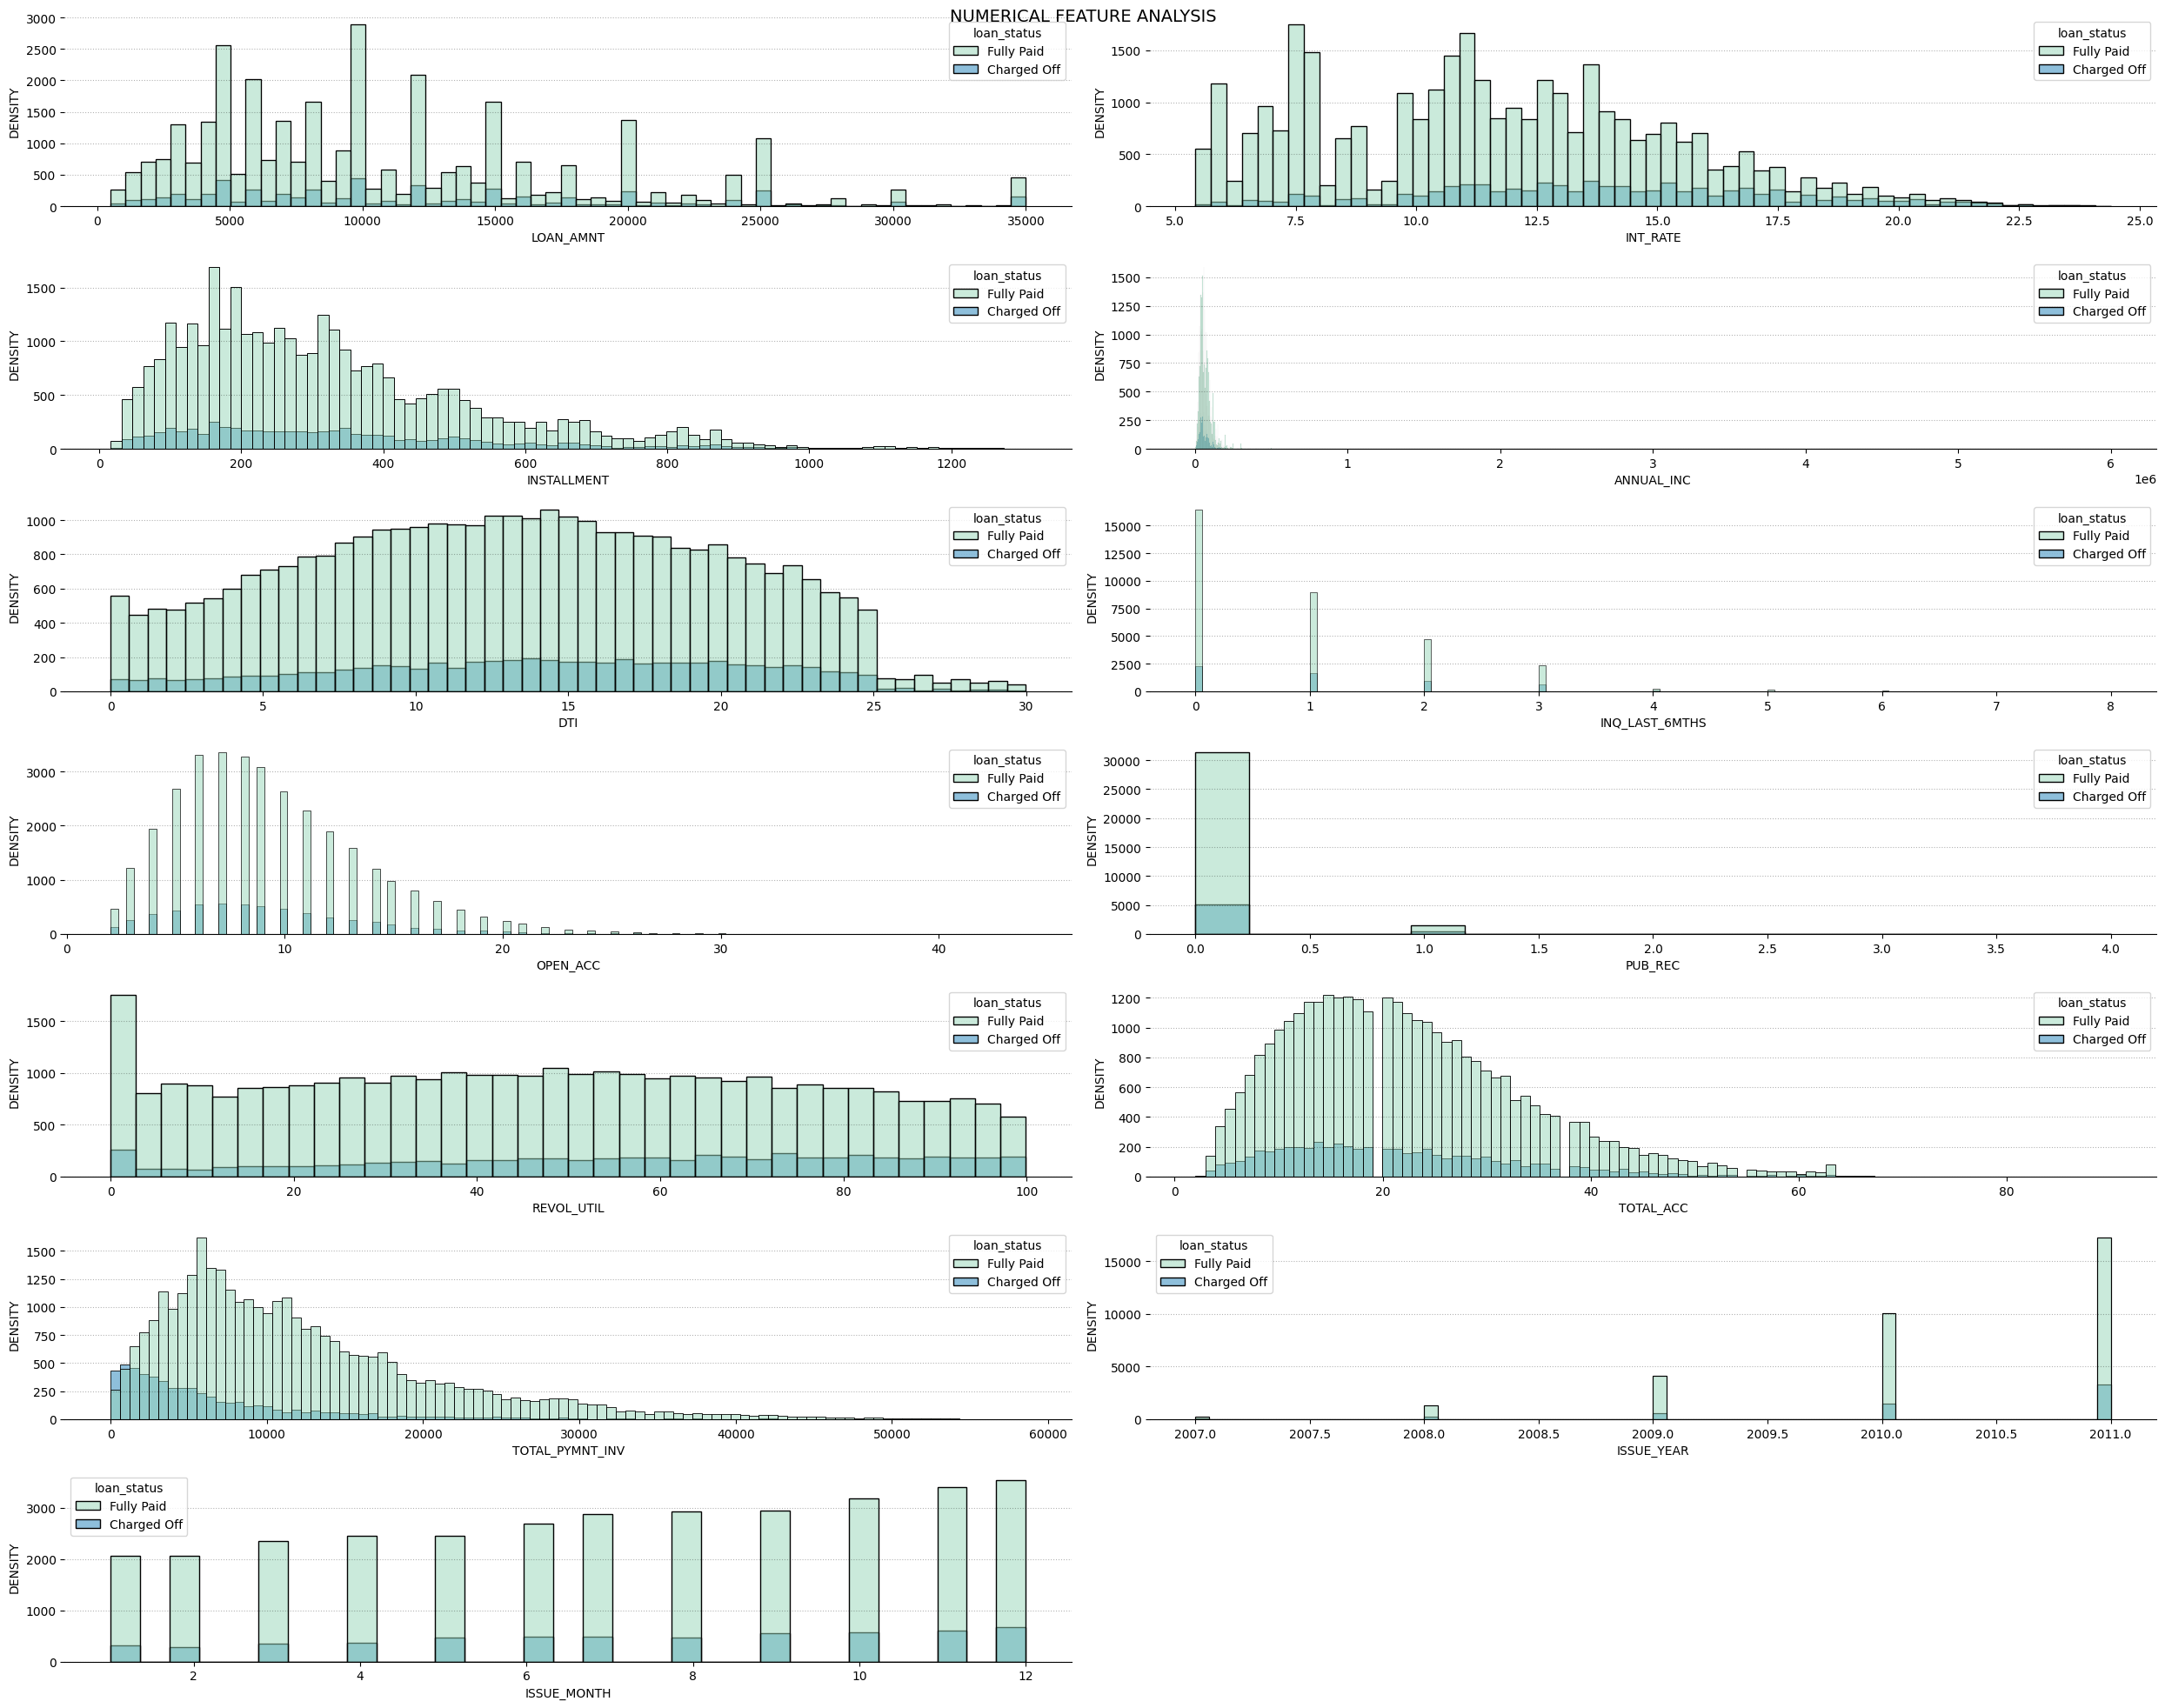

In [1136]:
fig, axes = plt.subplots(nrows=7,ncols=2,figsize=(25,20))
axes = axes.flatten()

# Graph for loan_status vs numerical columns
for i, cols in enumerate(num_cols):
  histplot(axes=axes[i],data=data,x_columns=cols,hue_labels='loan_status',palette='YlGnBu')

# Remove content for empty subplot
empty_subplot(axes[13])

plt.suptitle('NUMERICAL FEATURE ANALYSIS',fontsize=14)
plt.subplots_adjust(top=3)
plt.tight_layout()
plt.show()

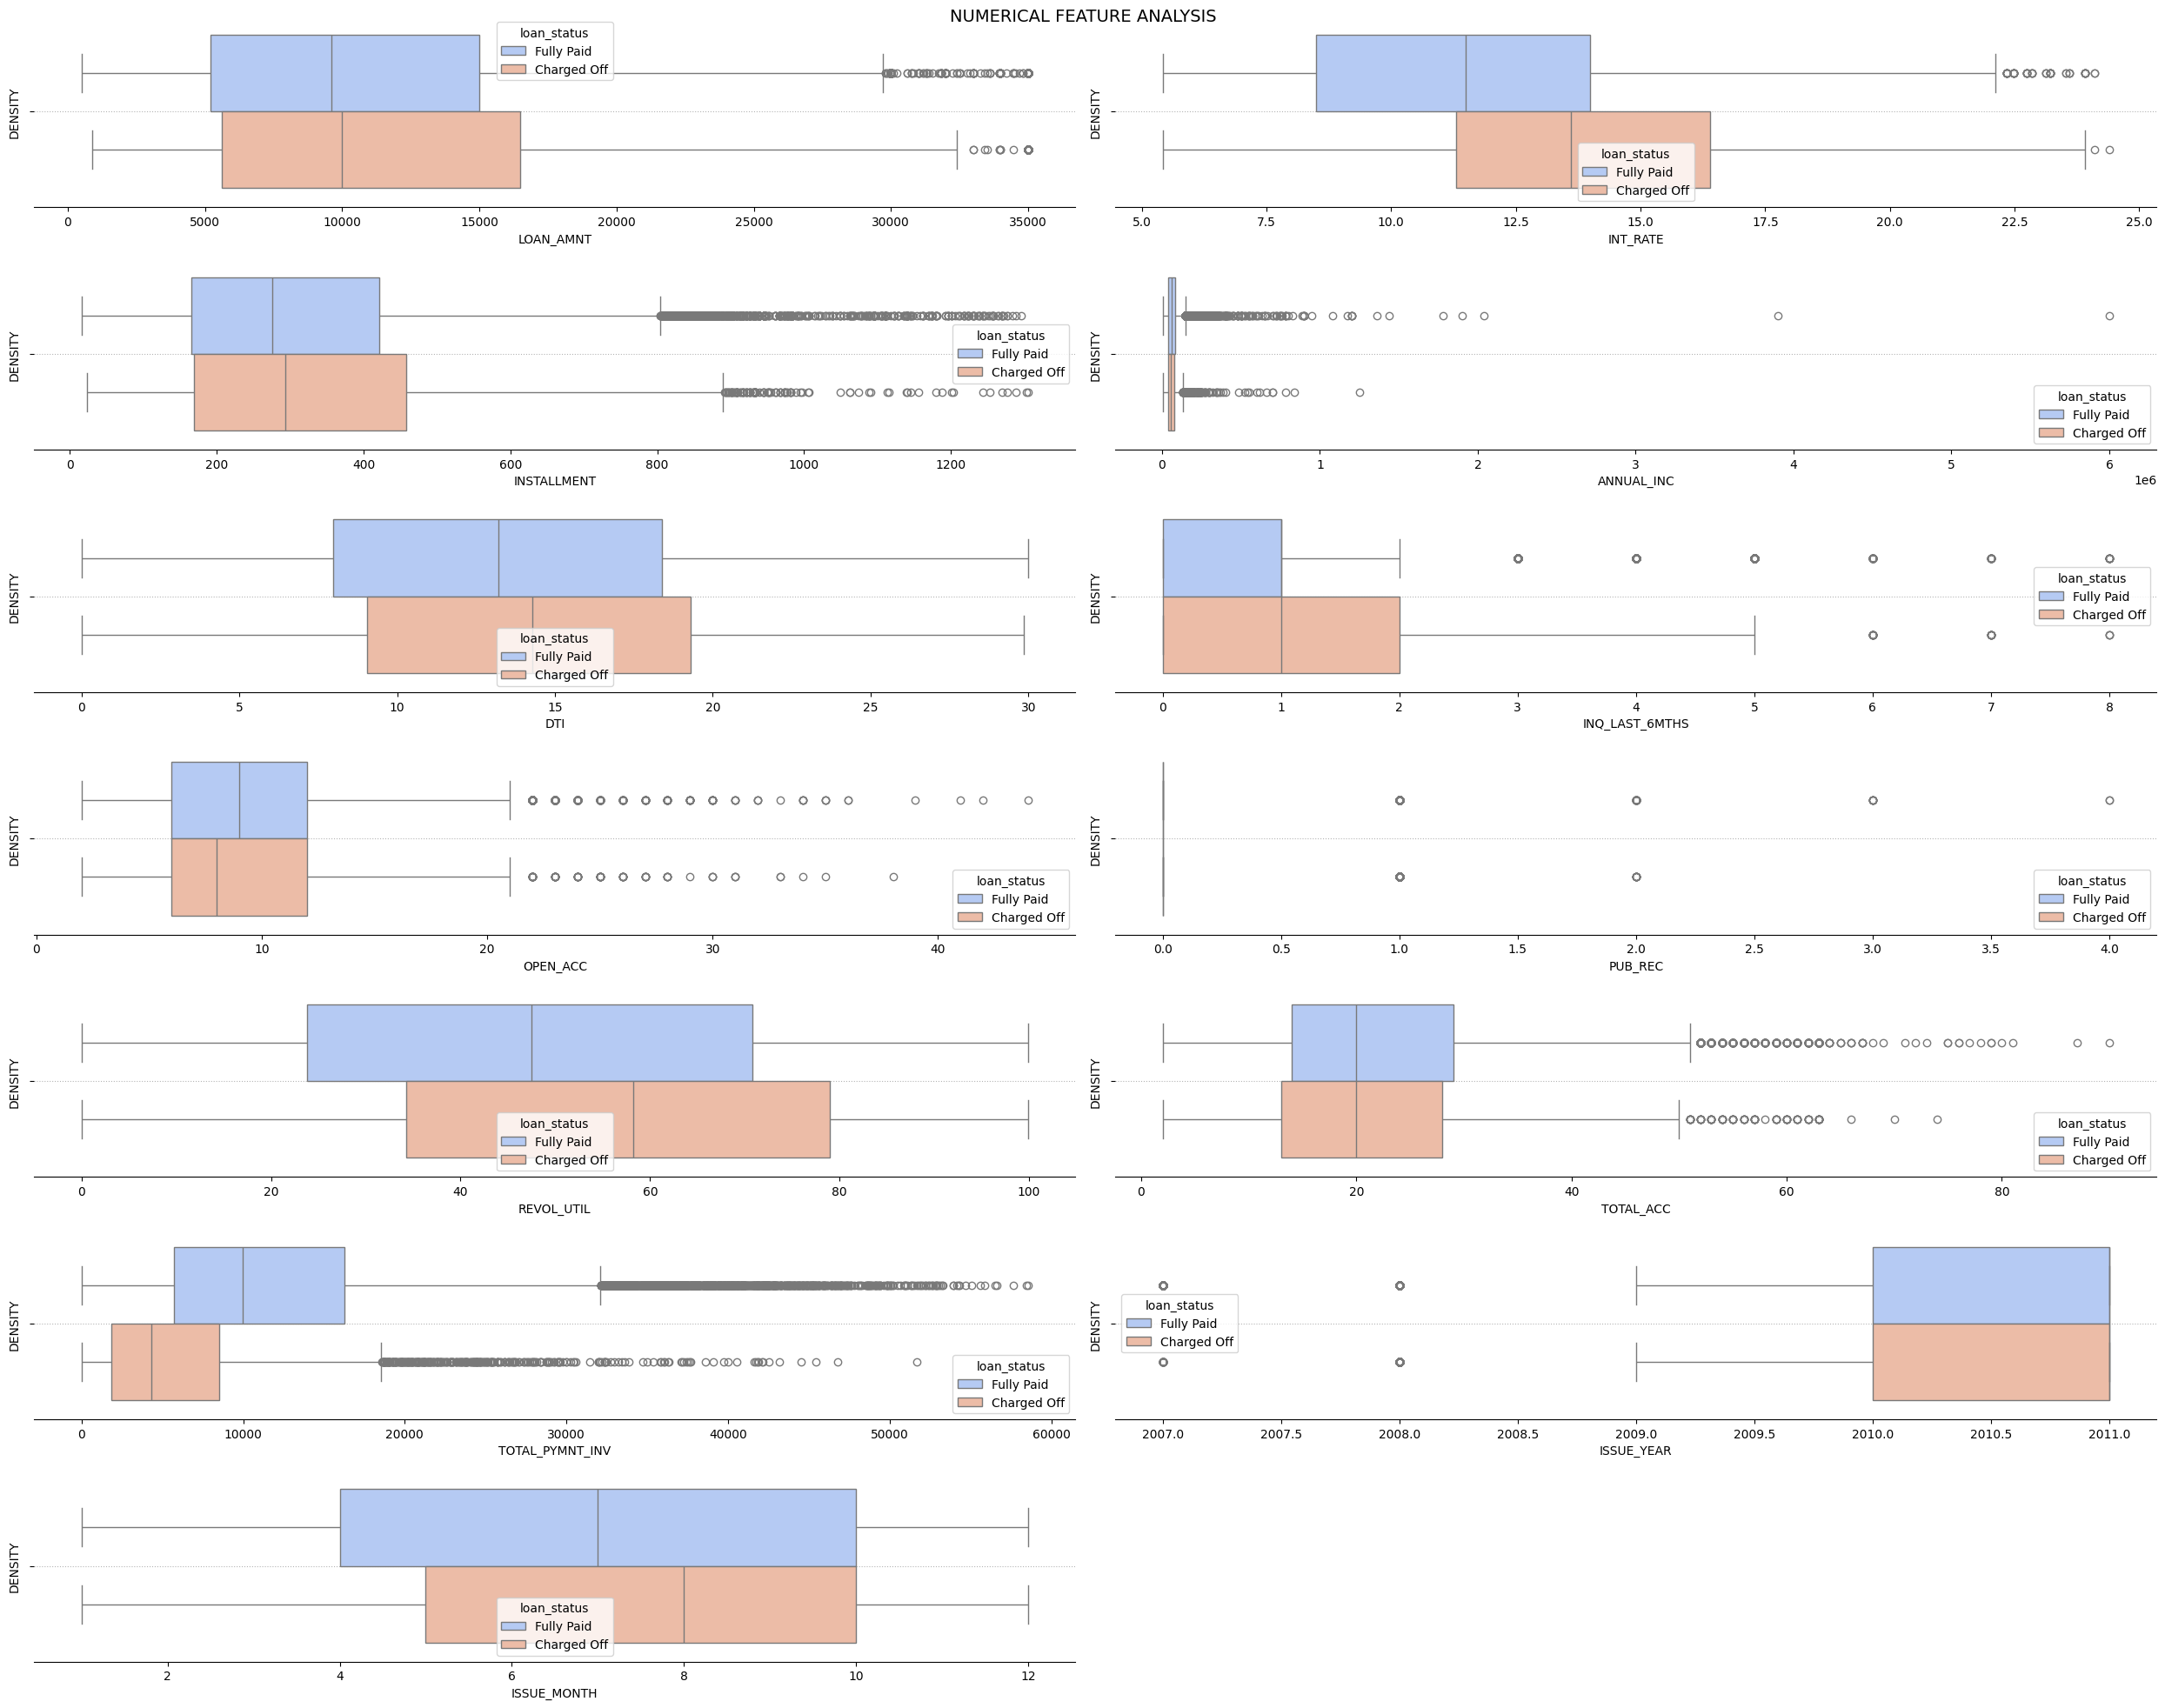

In [1137]:
# Create Box plot for numerical columns
fig, axes = plt.subplots(nrows=7,ncols=2,figsize=(25,20))
axes = axes.flatten()

# Graph for loan_status vs numerical columns
for i, cols in enumerate(num_cols):
  boxplot(axes=axes[i],data=data,x_columns=cols,hue_labels='loan_status',palette='coolwarm')

# Remove content for empty subplot
empty_subplot(axes[13])

plt.suptitle('NUMERICAL FEATURE ANALYSIS',fontsize=14)
plt.subplots_adjust(top=3)
plt.tight_layout()
plt.show()

###### **Five Number Summary**

In [1138]:
num_fs = pd.DataFrame(data[num_cols].describe())
num_fs

,loan_amnt,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,issue_year,issue_month
count,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,11.932219,322.466318,6.877797e+04,13.272727,0.871737,9.275423,0.055422,48.639653,22.052648,11271.196153,2010.309070,7.114757
std,7348.441646,3.691327,208.639215,6.421868e+04,6.673044,1.071546,4.401588,0.237804,28.400460,11.425861,8700.845592,0.882658,3.408523
min,500.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2007.000000,1.000000
25%,5300.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,6.000000,0.000000,25.100000,13.000000,5019.590000,2010.000000,4.000000
50%,9600.000000,11.710000,277.860000,5.886800e+04,13.370000,1.000000,9.000000,0.000000,49.000000,20.000000,9066.660000,2011.000000,7.000000
75%,15000.000000,14.380000,425.550000,8.200000e+04,18.560000,1.000000,12.000000,0.000000,72.200000,29.000000,15329.780000,2011.000000,10.000000
max,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,99.900000,90.000000,58563.680000,2011.000000,12.000000


###### **OBSERVATION**
1. Most borrowers prefer to get loan amount between 5k - 15k
2. Average interest rate is 12%, but there is a heavy spike in interest rate post 75 percentile
3. When the interest rate is low or the installment amount is less the probability of loan getting fully paid off is high
4. Looks like annual_inc feature has more outliers
5. When the DTI is lower, there is a greater capacity to pay back the loan
6. Greater inq_last_6mths (number of inquiries made by creditors on the applicant's credit report in the last six months) means poor credit score and hence impact the possibility of paying back the loan
7. When pub_rec is higher, there is high possibility of Charge Off
8. Every year the number of loan application is increased, and its greater in end of the year

##### **Outlier Treatment**

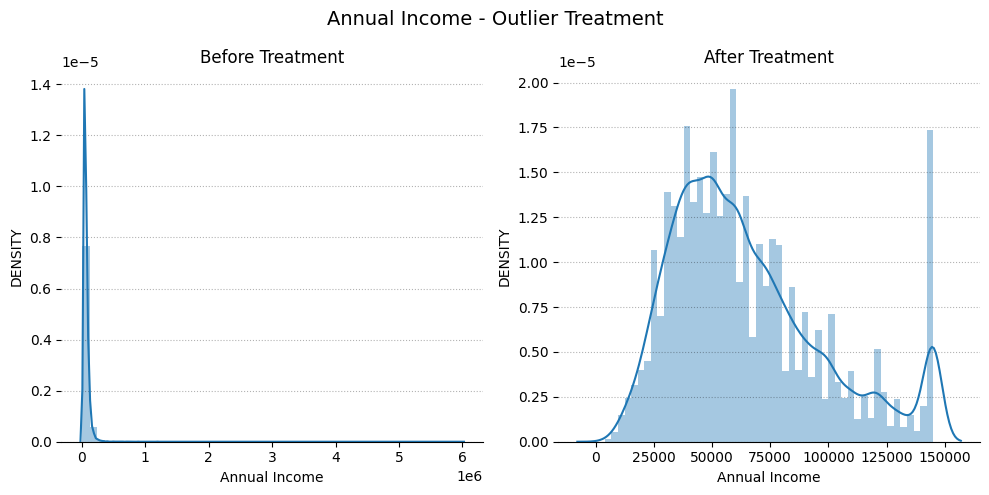

In [1139]:
# Outlier Treatment for Annual Income
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes = axes.flatten()

distplot(data['annual_inc'],axes=axes[0])
axes[0].set_xlabel('Annual Income')
axes[0].set_title('Before Treatment')

Q1 = data['annual_inc'].quantile(0.25)
Q3 = data['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lf = Q1 - 1.5*IQR
uf = Q3 + 1.5*IQR

data['annual_inc'].clip(lower=lf,upper=uf,inplace=True)

distplot(data['annual_inc'],axes=axes[1])
axes[1].set_xlabel('Annual Income')
axes[1].set_title('After Treatment')

plt.suptitle("Annual Income - Outlier Treatment",fontsize=14)
plt.tight_layout()
plt.show()

##### **Loan Amount Analysis**

###### **Graphical Representation**

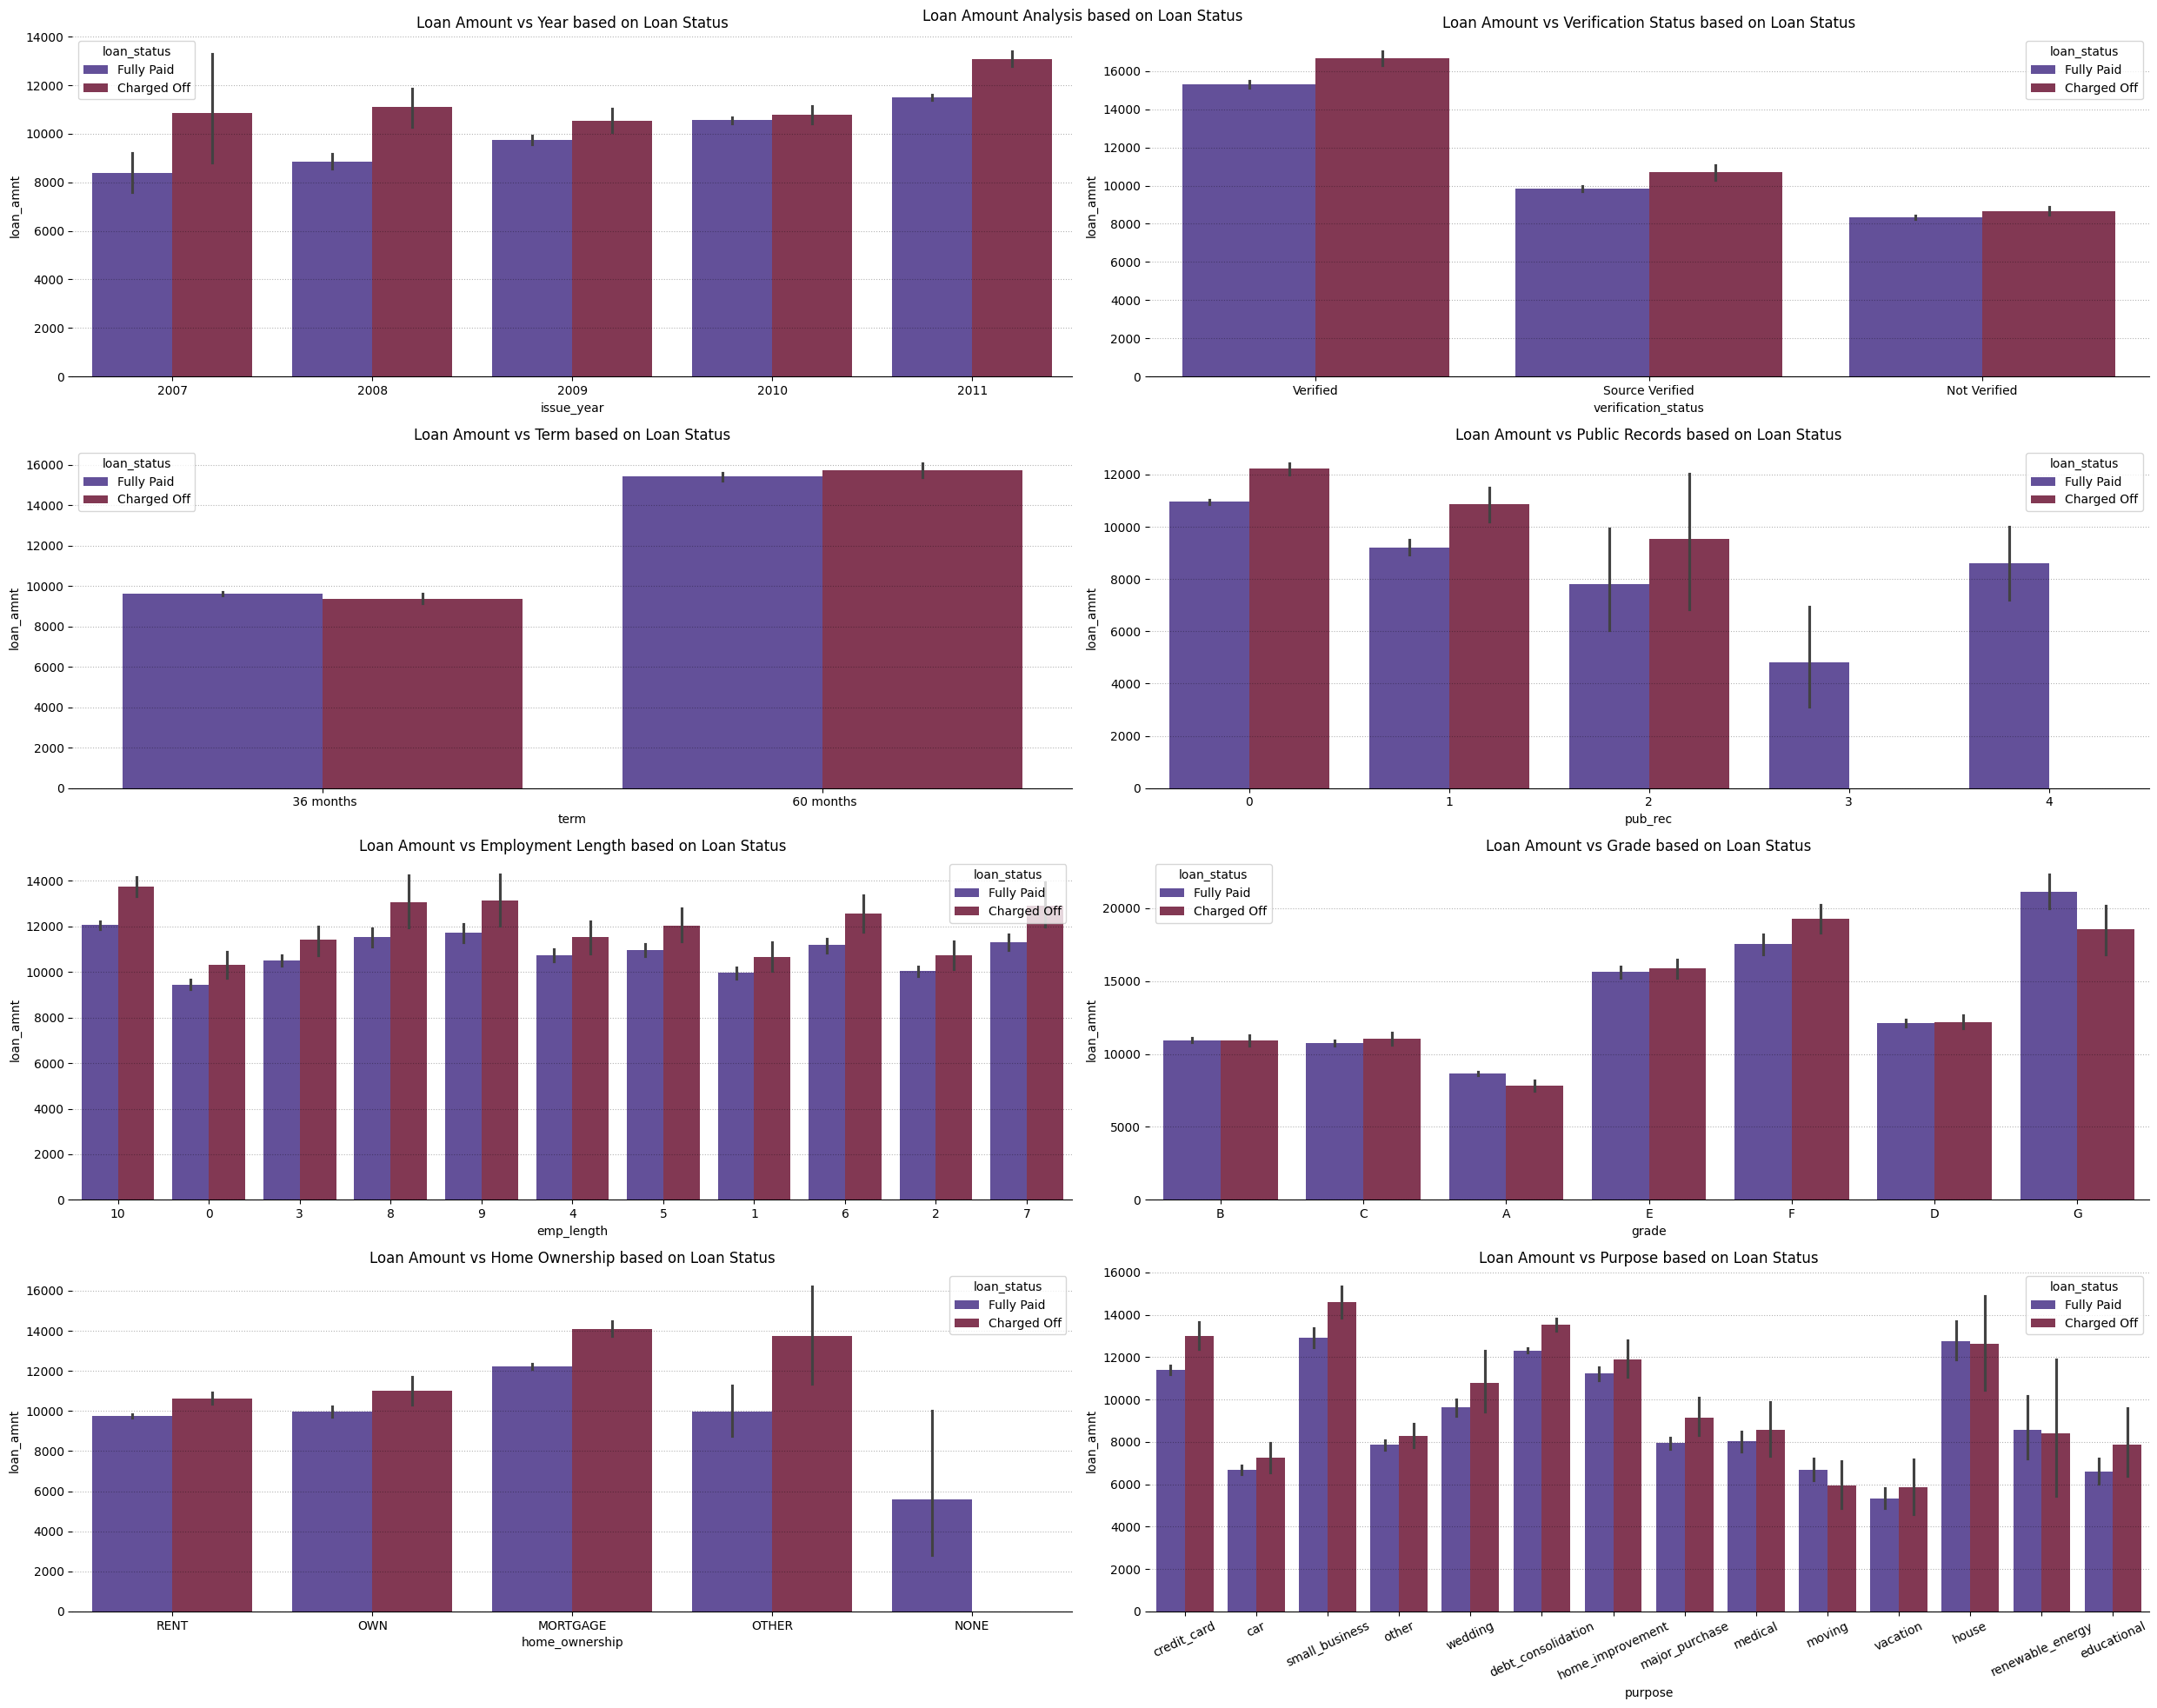

In [1140]:
# Analysis of Loan amount against various columns based on Loan Status
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(25,20))
axes = axes.flatten()

barplot(axes=axes[0], data=data, x_columns='issue_year', y_columns='loan_amnt', palette='twilight', hue='loan_status',orient=None)
axes[0].set_title('Loan Amount vs Year based on Loan Status')

barplot(axes=axes[1], data=data, x_columns='verification_status', y_columns='loan_amnt', palette='twilight', hue='loan_status',orient=None)
axes[1].set_title('Loan Amount vs Verification Status based on Loan Status')

barplot(axes=axes[2], data=data, x_columns='term', y_columns='loan_amnt', palette='twilight', hue='loan_status',orient=None)
axes[2].set_title('Loan Amount vs Term based on Loan Status')

barplot(axes=axes[3], data=data, x_columns='pub_rec', y_columns='loan_amnt', palette='twilight', hue='loan_status',orient=None)
axes[3].set_title('Loan Amount vs Public Records based on Loan Status')

barplot(axes=axes[4], data=data, x_columns='emp_length', y_columns='loan_amnt', palette='twilight', hue='loan_status',orient=None)
axes[4].set_title('Loan Amount vs Employment Length based on Loan Status')

barplot(axes=axes[5], data=data, x_columns='grade', y_columns='loan_amnt', palette='twilight', hue='loan_status',orient=None)
axes[5].set_title('Loan Amount vs Grade based on Loan Status')

barplot(axes=axes[6], data=data, x_columns='home_ownership', y_columns='loan_amnt', palette='twilight', hue='loan_status',orient=None)
axes[6].set_title('Loan Amount vs Home Ownership based on Loan Status')

barplot(axes=axes[7], data=data, x_columns='purpose', y_columns='loan_amnt', palette='twilight', hue='loan_status',orient=None)
axes[7].set_title('Loan Amount vs Purpose based on Loan Status')

# rotate xlabel where its not fit properly
rotate_xlabels(axes[7],25)

fig.suptitle('Loan Amount Analysis based on Loan Status')
plt.tight_layout()
plt.show()

###### **OBSERVATION**
1. Every year the Loan amount borrowed is increasing which inturn have increased the risk of Charge Off
2. When the Income is verified the loan amount sanctioned is also increased, but the risk of Charge Off is decreased
3. Increase in repayment month increases both loan amount and probability of charge off
4. When the number of derogatory public record increases the chance of loan falling into Charge Off decreases
5. Percentage of Loan amount borrowed is high when the borrower has worked for a longer time
6. For Grade E,F,G the sanctioned loan amount is more compared to other grades
7. Majority of home owners have borrowed loan for mortgage purpose
8. Loan amount borrowed more than 12k for various purpose is highly likely to be repayed

##### **Multi-variate Analysis**

###### **Encoding**

In [1141]:
# copy data and remove sub-grade column
e_data = data.drop(columns=['sub_grade'])
e_data.shape

(38577, 20)

In [1142]:
# For simplification convert emp_length to numeric column
e_data['emp_length'] = pd.to_numeric(e_data['emp_length'])
e_data['emp_length'].dtypes

dtype('int64')

In [1143]:
# Copy data for backup
e_data = pd.get_dummies(e_data, drop_first=True, dtype='int')
e_data.shape

(38577, 41)

###### **Detailed Data Info**

In [1144]:
data_info = info(e_data)
data_info

,Column Name,Data Type,Missing Percent,Unique Value Count,Sample 1,Sample 2
0,loan_amnt,int64,0.0,870,5000.00,2500.00
1,int_rate,float64,0.0,370,10.65,15.27
2,installment,float64,0.0,15022,162.87,59.83
3,emp_length,int64,0.0,11,10.00,0.00
4,annual_inc,float64,0.0,4818,24000.00,30000.00
5,dti,float64,0.0,2853,27.65,1.00
6,inq_last_6mths,int64,0.0,9,1.00,5.00
7,open_acc,int64,0.0,40,3.00,3.00
8,pub_rec,int64,0.0,5,0.00,0.00
9,revol_util,float64,0.0,1088,83.70,9.40


###### **Heatmap**

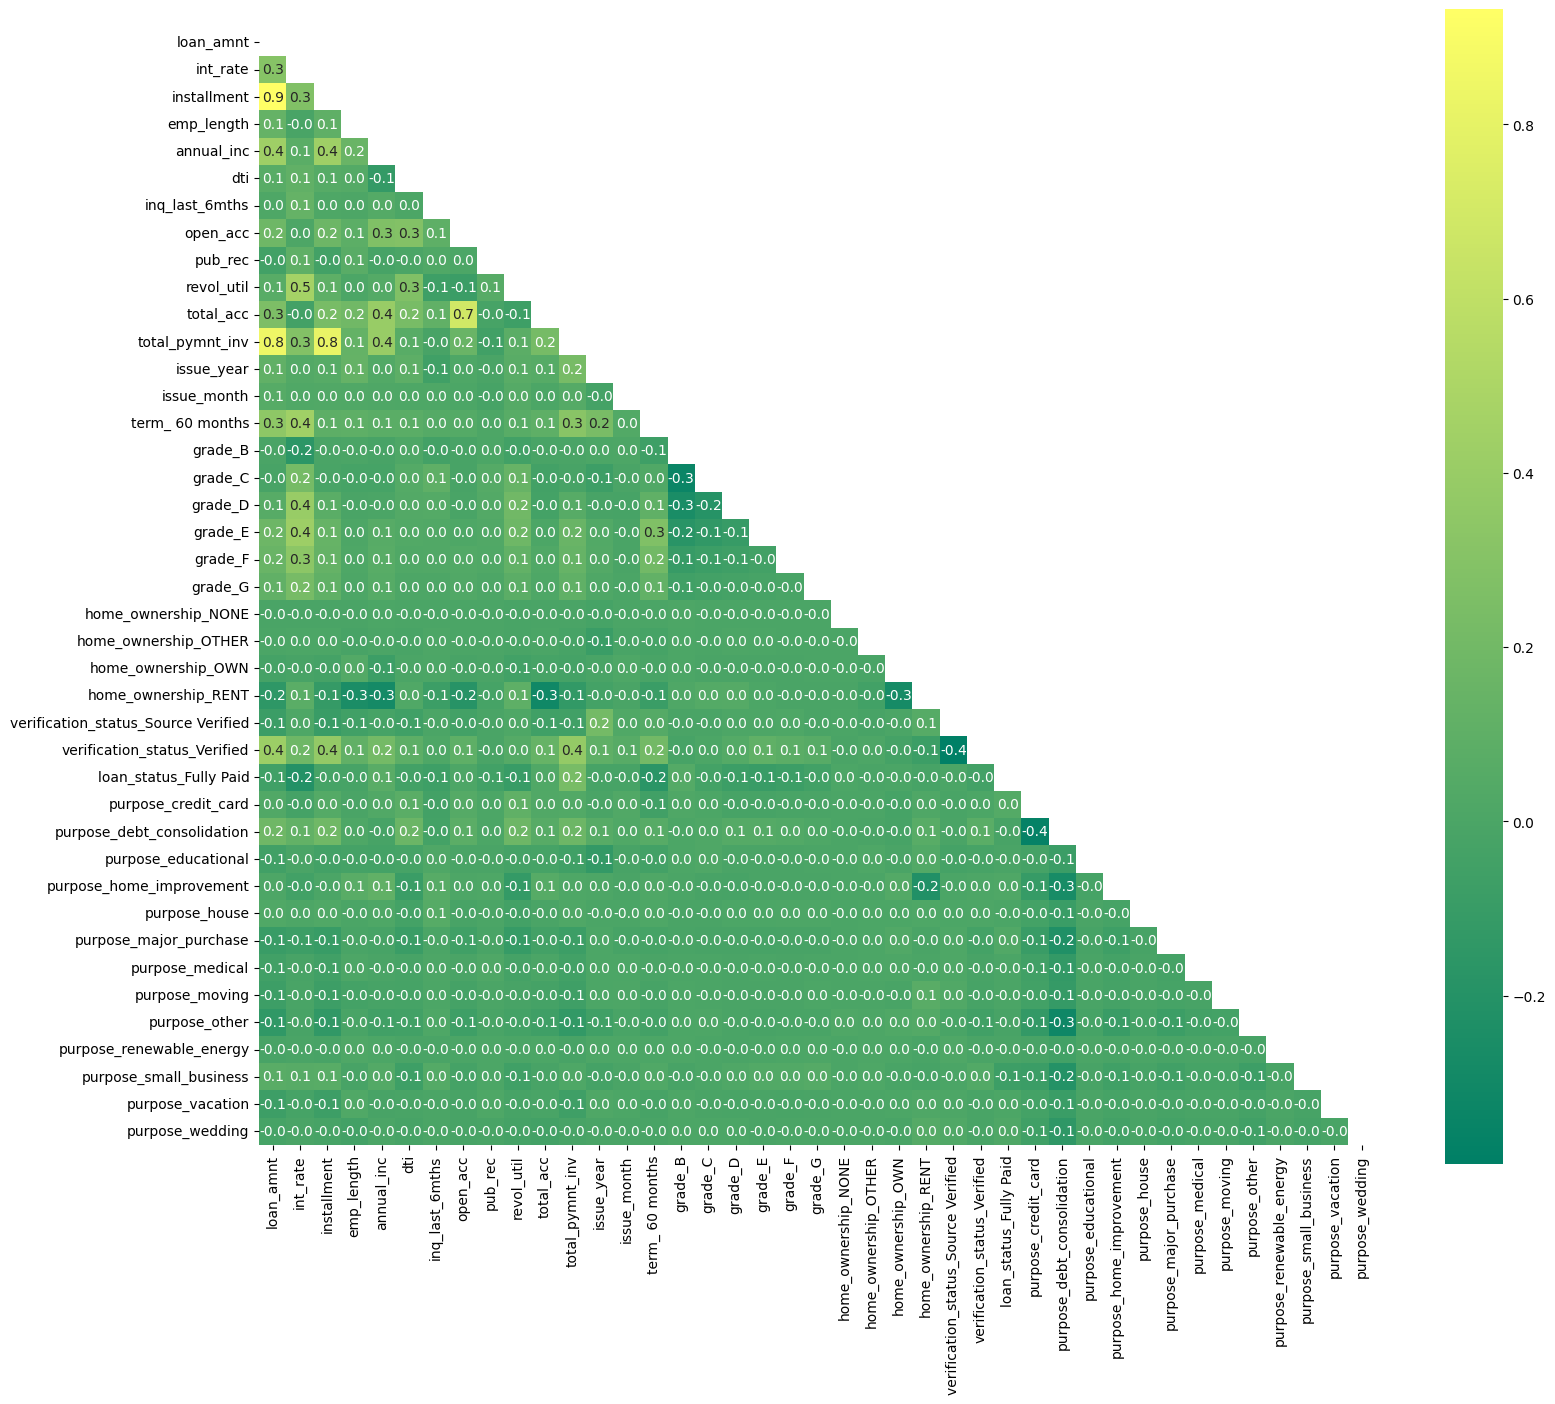

In [1145]:
# Creating a correlation heatmap
plt.figure(figsize=(18,15))
correlation = e_data.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt = '.1f', mask=mask, square=True, cmap='summer')
plt.show()

### **FINAL OBSERVATION**
The below mentioned are the risk factors which may lead the loan to charge off
1. Loan amount borrowed for more number of payments
2. Borrower within Grade E, F, G are more likely to Chargeoff
3. Borrowers having employment for 10+ years have less chance of not paying back the loan
4. Loan with interest rate greater than 12%
5. High monthly payment owed by the borrower once the loan initiates
6. Debt to Income ration should be low for the borrower to payback the loan
7. Greater in number of inquiries made by creditors on the applicant's credit report in the last six months means poor credit score and hence impacts the possibility of paying back the loan
8. Borrowers having high number of derogatory public records
9. Non Verified Borrowers have high chance of not paying back the loan
10. Increase in repayment month increases the probability of charge off
11. Loan more than 12k which was borrowed for credit card, small businesses, debt consolidation are high likely to be repayed